In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df=pd.read_csv('./Absenteeism_at_work.csv',sep=';')

In [4]:
df.shape

(740, 21)

In [5]:
df.columns

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')

In [6]:
df.columns[:-1]

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index'],
      dtype='object')

In [7]:
df.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2


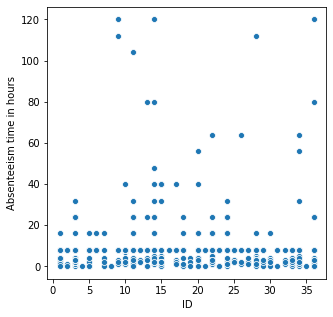

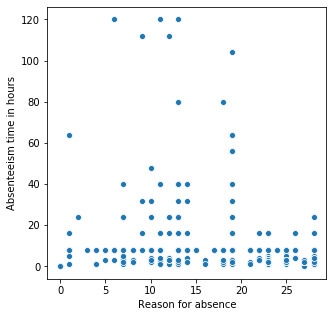

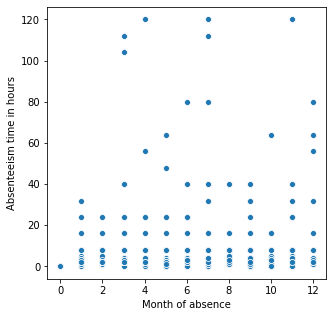

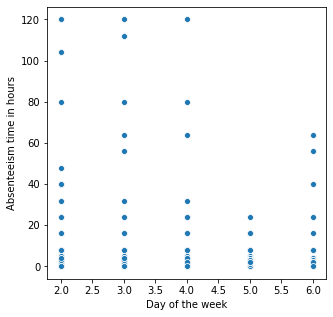

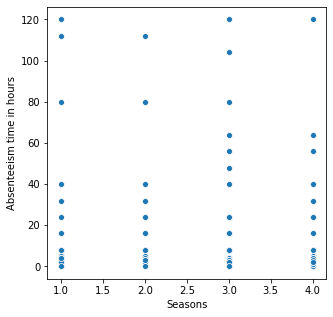

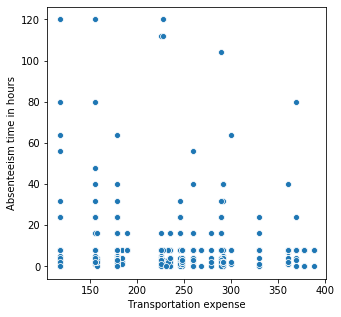

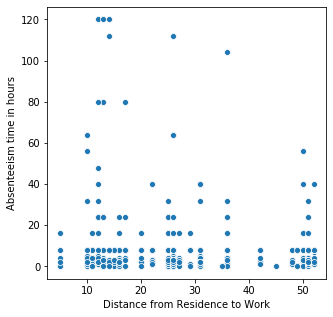

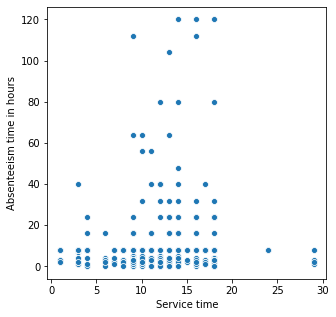

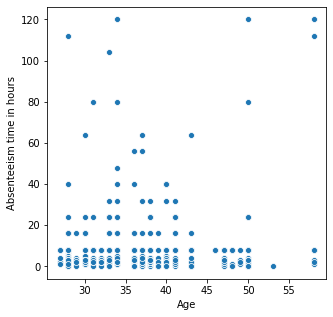

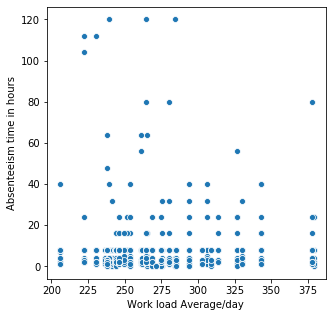

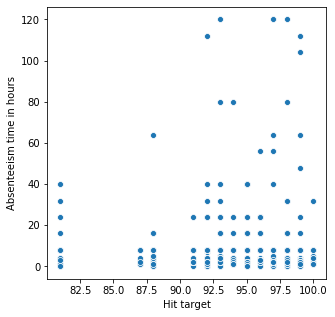

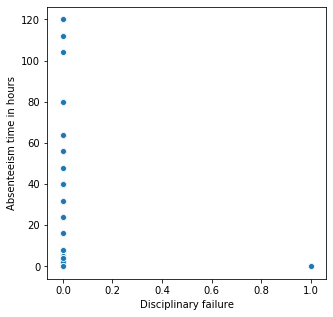

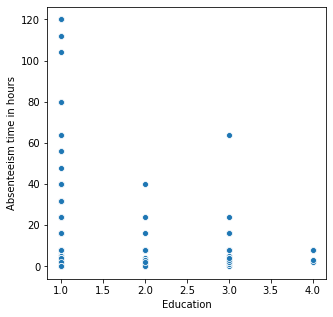

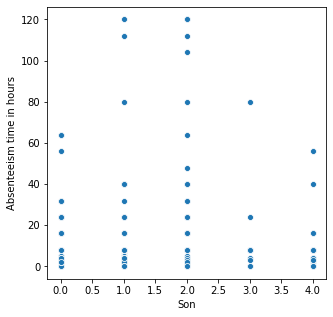

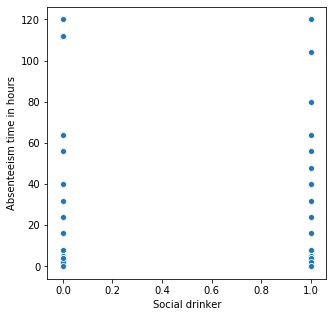

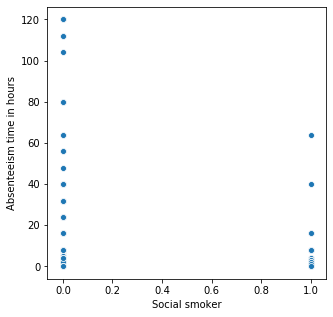

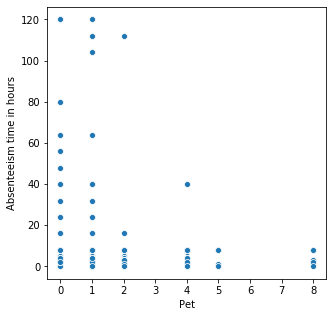

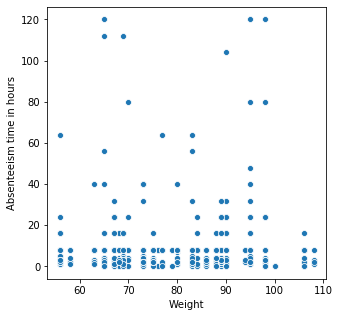

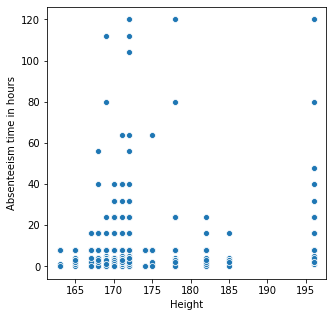

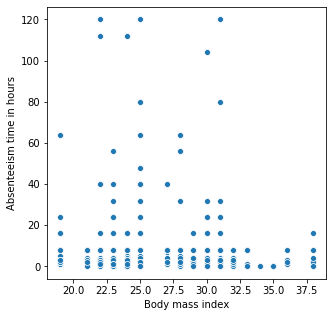

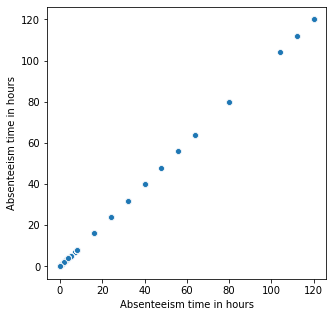

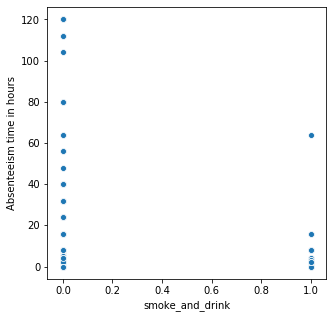

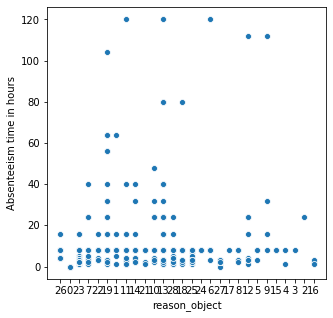

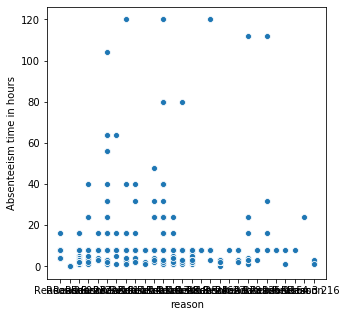

In [65]:
#
for shad in df.columns:
    fig, ax = plt.subplots(figsize=(5, 5),)
    sns.scatterplot(y="Absenteeism time in hours", x = shad, data=df)#,hue='reason')
    plt.show(fig,block=True)
    #ax = sns.stripplot(x = "Absenteeism time in hours", y = shad, data=df)

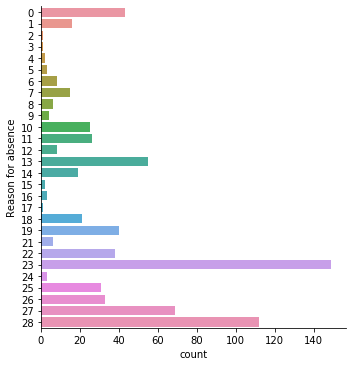

In [26]:
sns.factorplot(
    y='Reason for absence',
    data=df,
    kind='count',

)

In [8]:
dfsorted=df.sort_values(by='Absenteeism time in hours')

In [9]:
from sklearn import preprocessing

In [10]:
A = dfsorted.values #returns an array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(A)
normalized_dataframe = pd.DataFrame(x_scaled,columns=dfsorted.columns)


In [15]:
index_names = df[ df['Absenteeism time in hours'] < 20 ].index 
  

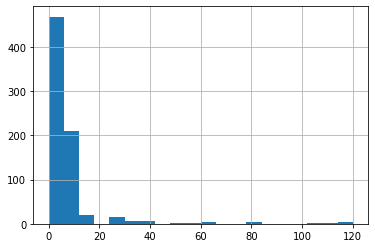

In [67]:
df['Absenteeism time in hours'].hist(bins=20)

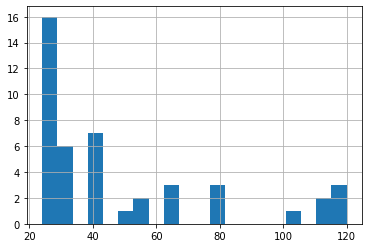

In [16]:
df.drop(index_names)['Absenteeism time in hours'].hist(bins=20)

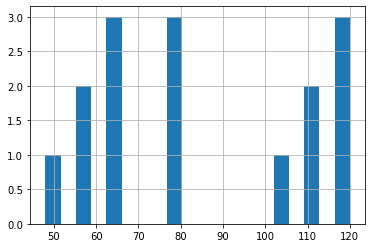

In [70]:
dfdropped40['Absenteeism time in hours'].hist(bins=20)

In [17]:
index_names = df[ df['Absenteeism time in hours'] < 20 ].index 
dfdropped=df.drop(index_names)

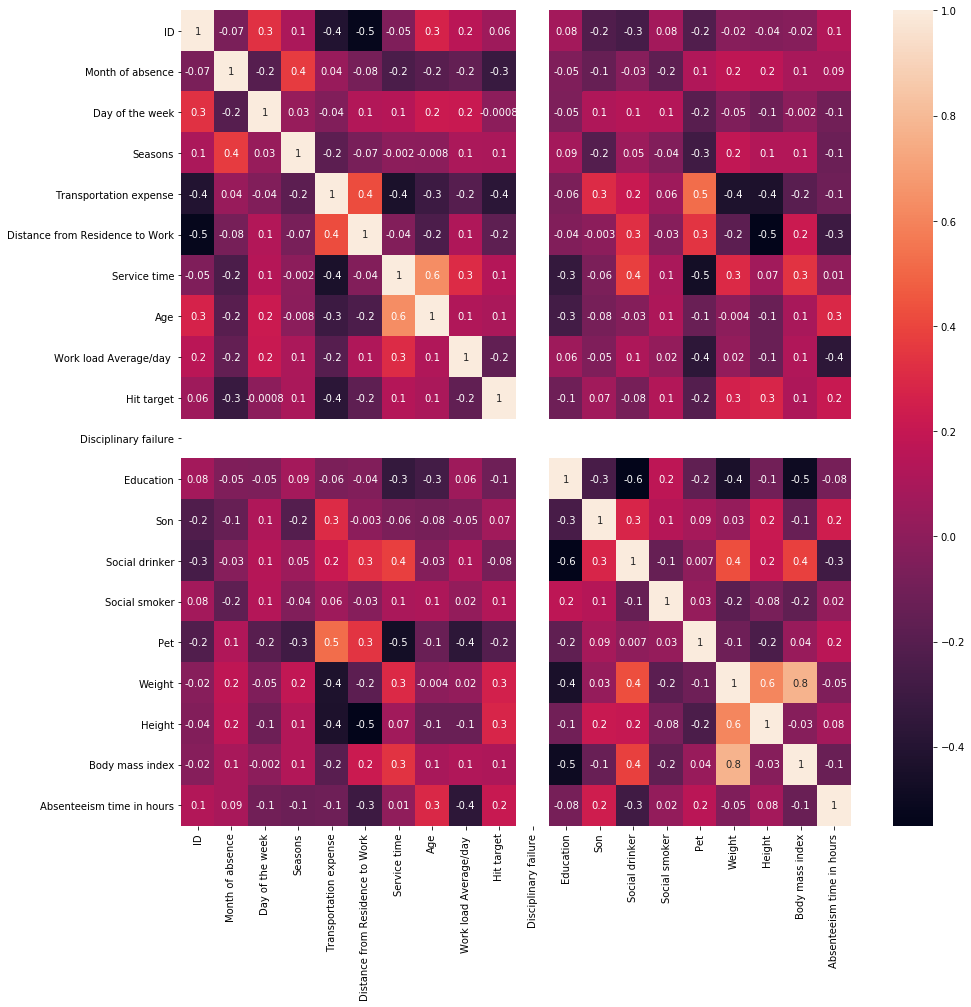

In [18]:
plt.figure(figsize=(15,15))
corr = dfdropped.drop(columns=['Reason for absence']).corr()
sns.heatmap(corr,annot=True,fmt='.1g')

In [3]:
df['smoke_and_drink']=df['Social smoker']&df['Social drinker']

In [5]:
rated_dummies = pd.get_dummies(df['Reason for absence'], prefix='reason')
encoded=pd.concat([df, rated_dummies], axis=1)

In [6]:
encoded

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,reason_18,reason_19,reason_21,reason_22,reason_23,reason_24,reason_25,reason_26,reason_27,reason_28
0,11,26,7,3,1,289,36,13,33,239.554,...,0,0,0,0,0,0,0,1,0,0
1,36,0,7,3,1,118,13,18,50,239.554,...,0,0,0,0,0,0,0,0,0,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,0,0,0,1,0,0,0,0,0
3,7,7,7,5,1,279,5,14,39,239.554,...,0,0,0,0,0,0,0,0,0,0
4,11,23,7,5,1,289,36,13,33,239.554,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,11,14,7,3,1,289,36,13,33,264.604,...,0,0,0,0,0,0,0,0,0,0
736,1,11,7,3,1,235,11,14,37,264.604,...,0,0,0,0,0,0,0,0,0,0
737,4,0,0,3,1,118,14,13,40,271.219,...,0,0,0,0,0,0,0,0,0,0
738,8,0,0,4,2,231,35,14,39,271.219,...,0,0,0,0,0,0,0,0,0,0


In [7]:
from sklearn.ensemble import ExtraTreesClassifier

In [8]:
model=ExtraTreesClassifier()
model.fit(encoded.drop(columns=['Absenteeism time in hours']),encoded['Absenteeism time in hours'])

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [9]:
important_features=pd.Series(model.feature_importances_,index=encoded.drop(columns=['Absenteeism time in hours']).columns)

In [20]:
top15=list(important_features.nlargest(15).index)
top15

['Day of the week',
 'Work load Average/day ',
 'Hit target',
 'Month of absence',
 'Reason for absence',
 'Seasons',
 'reason_0',
 'Disciplinary failure',
 'reason_23',
 'reason_27',
 'Transportation expense',
 'ID',
 'Son',
 'Service time',
 'Weight']

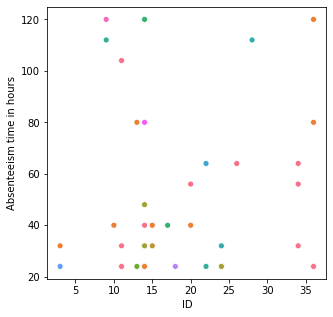

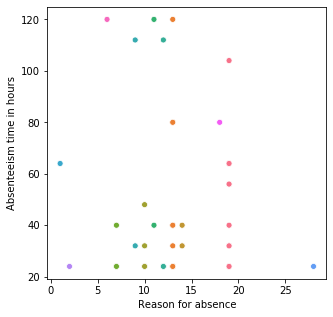

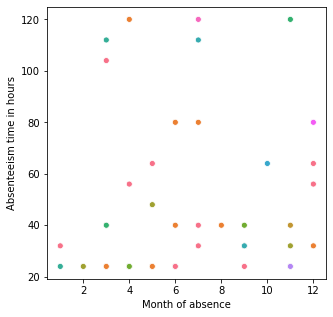

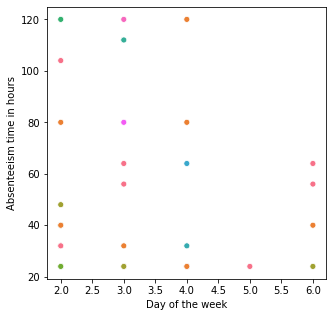

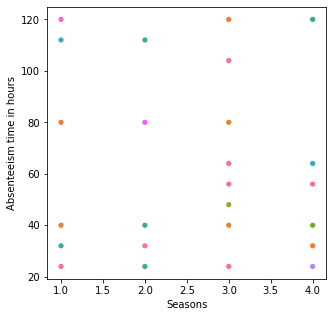

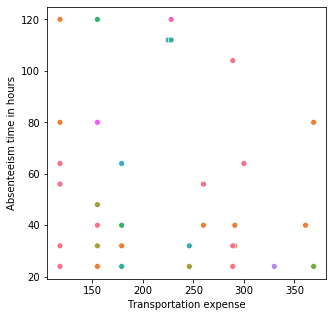

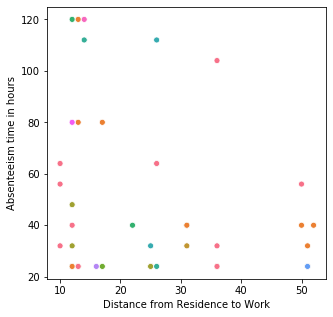

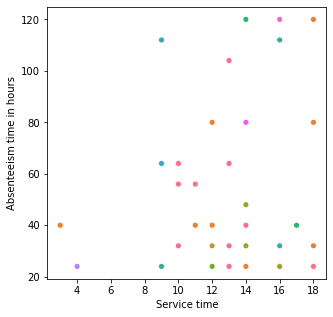

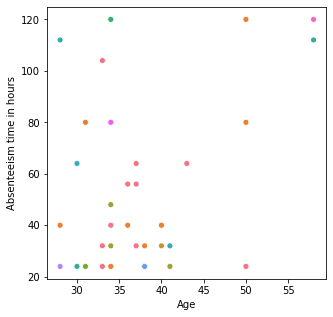

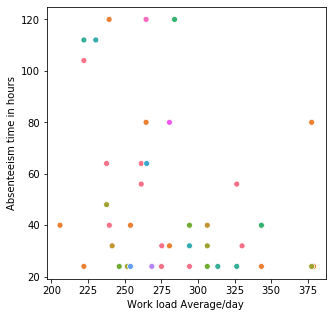

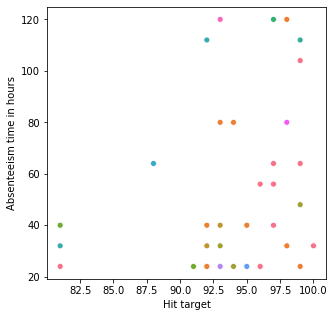

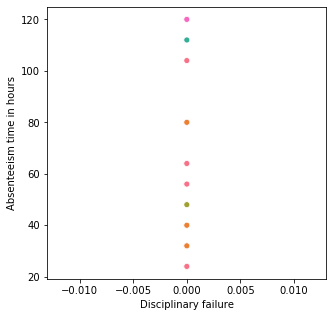

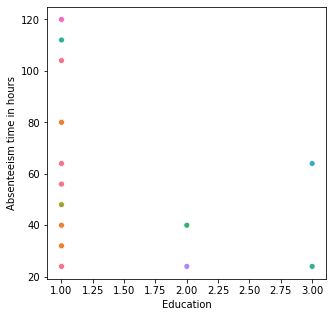

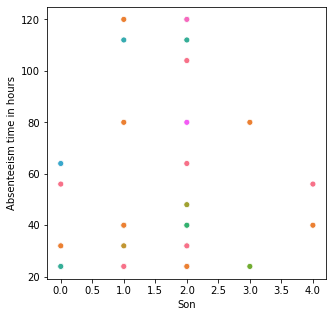

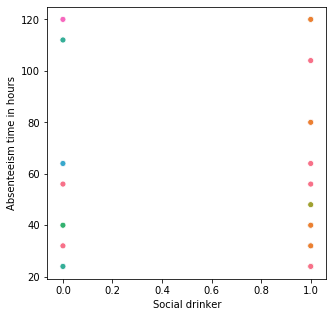

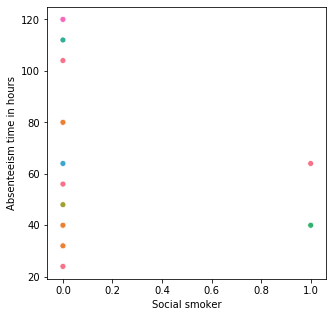

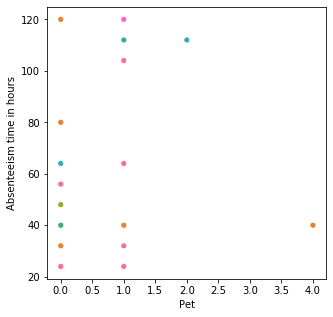

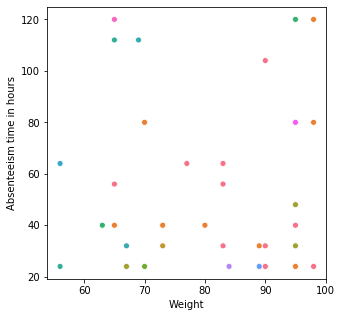

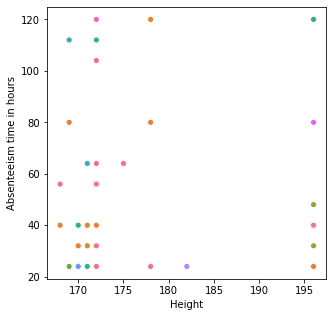

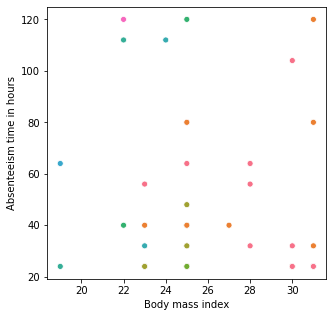

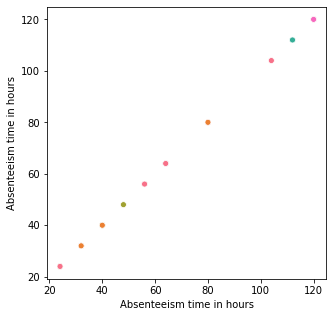

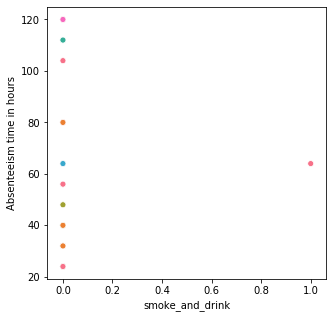

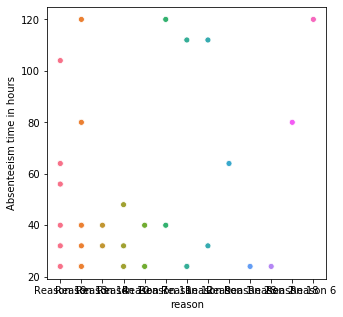

In [36]:
for shad in dfdropped.columns:
    fig, ax = plt.subplots(figsize=(5, 5),)
    sns.scatterplot(y="Absenteeism time in hours", x = shad, data=dfdropped,hue="reason",legend=False)
    plt.show(fig)

C:\coding\python\Python38\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


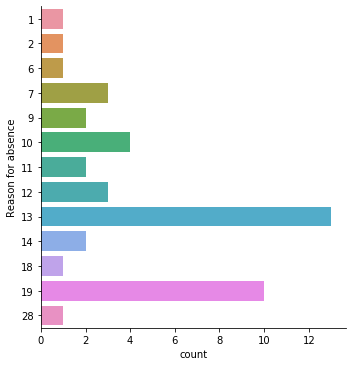

In [19]:
sns.factorplot(
    y='Reason for absence',
    data=dfdropped,
    kind='count',

)

In [25]:
dfdropped["reason"] = dfdropped['Reason for absence'].astype(str)

In [37]:
df["reason"]="Reason "+df["reason_object"]

In [33]:
dfdropped.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours,smoke_and_drink,reason
8,14,19,7,2,1,155,12,14,34,239.554,...,2,1,0,0,95,196,25,40,0,Reason 19
22,10,13,8,2,1,361,52,3,28,205.917,...,1,1,0,4,80,172,27,40,0,Reason 13
49,15,14,9,2,4,291,31,12,40,241.476,...,1,1,0,1,73,171,25,32,0,Reason 14
85,14,10,11,2,4,155,12,14,34,306.345,...,2,1,0,0,95,196,25,32,0,Reason 10
87,15,14,11,2,4,291,31,12,40,306.345,...,1,1,0,1,73,171,25,40,0,Reason 14


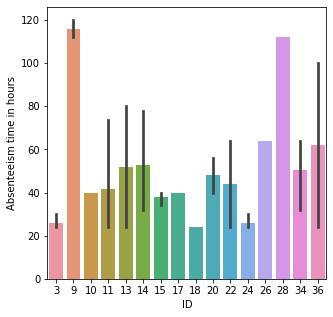

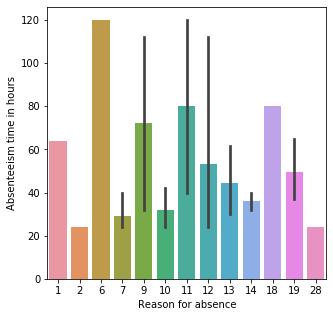

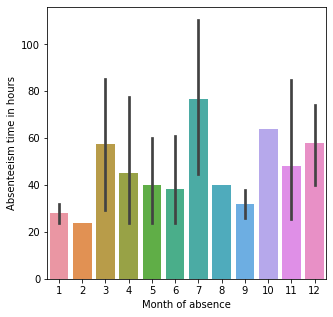

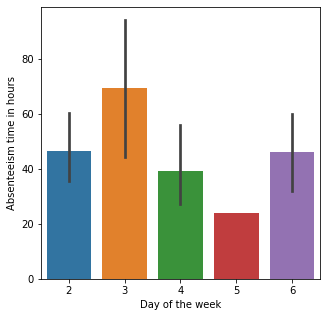

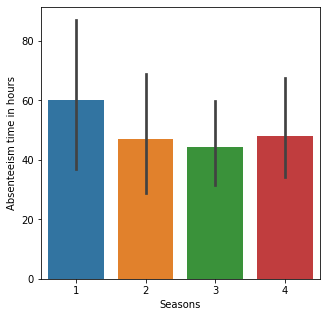

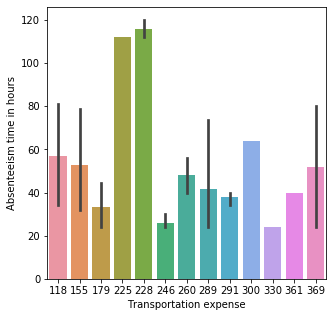

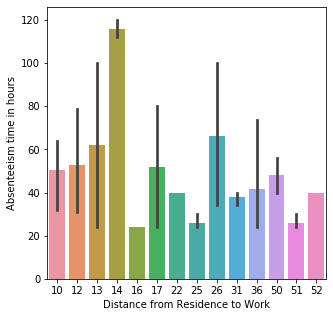

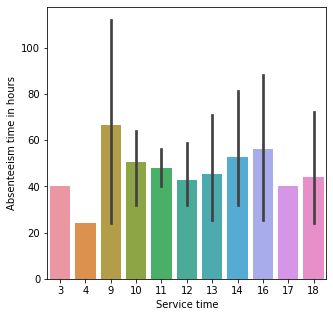

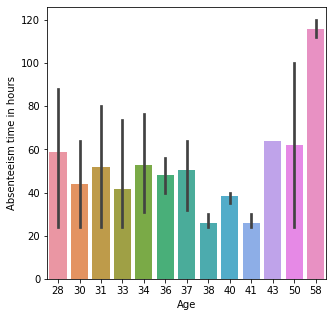

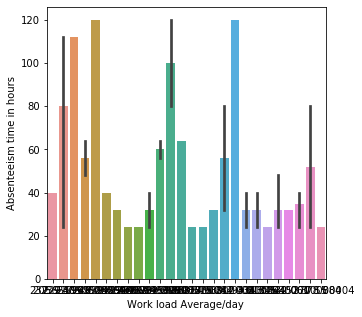

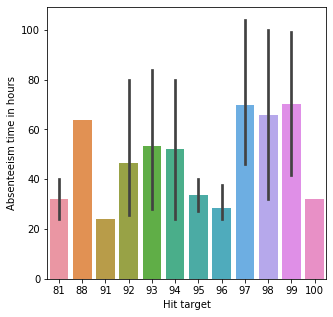

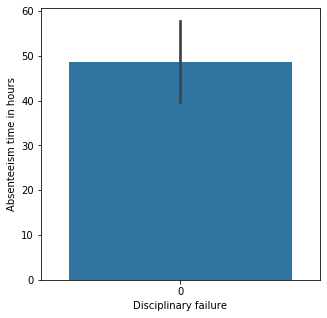

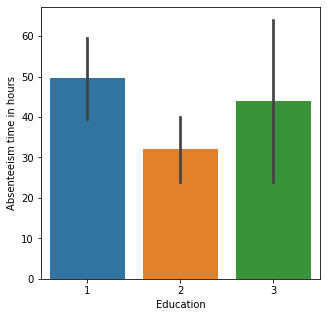

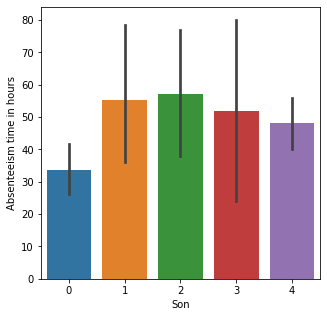

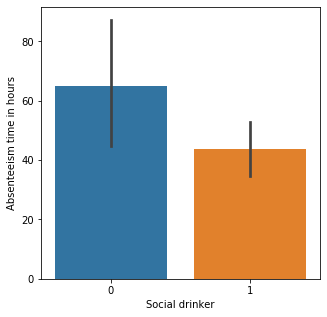

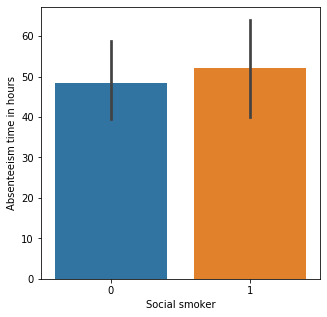

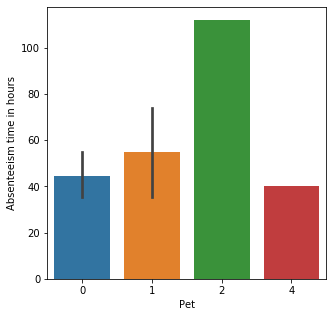

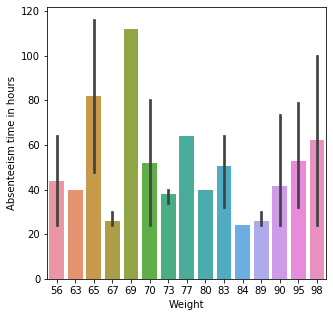

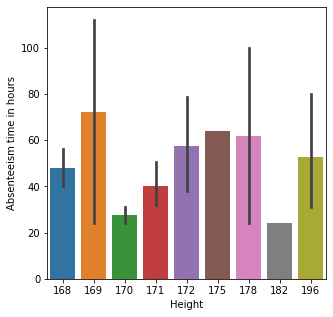

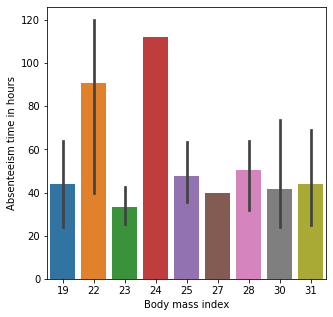

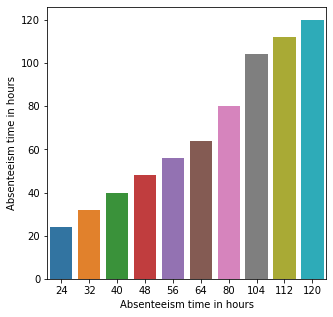

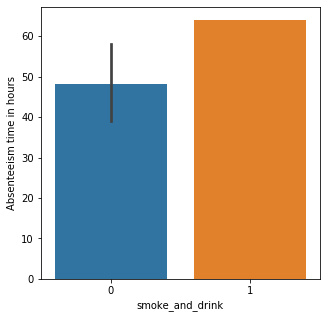

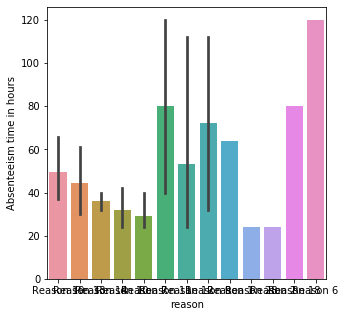

In [42]:
for shad in dfdropped.columns:
    fig, ax = plt.subplots(figsize=(5, 5),)
    sns.barplot(y="Absenteeism time in hours", x = shad,data=dfdropped)
    plt.show(fig)


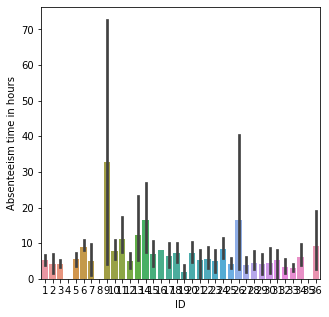

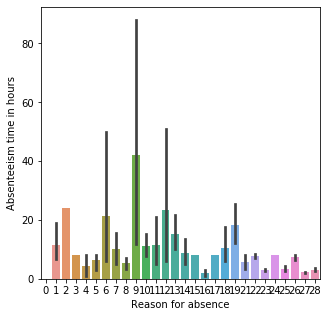

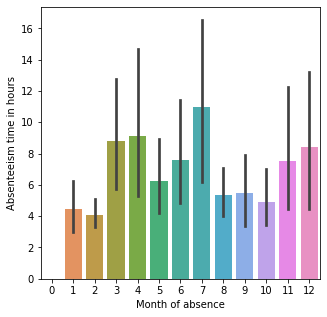

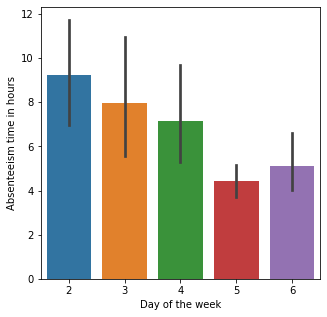

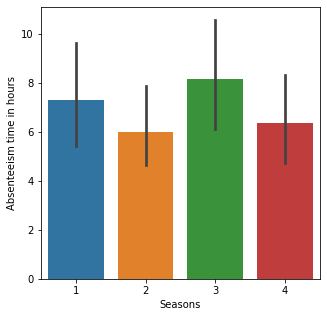

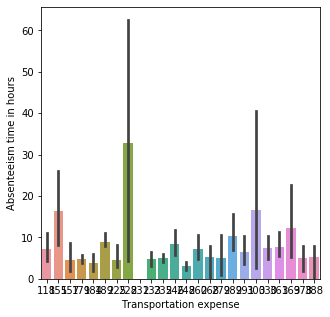

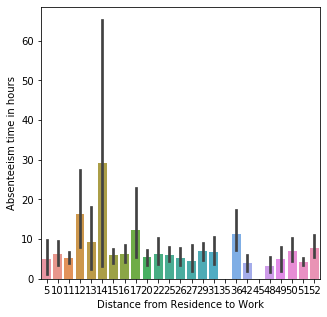

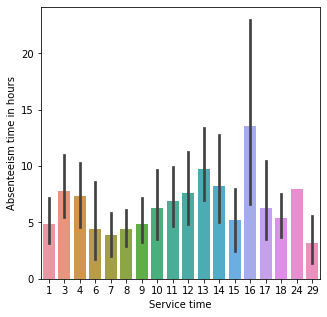

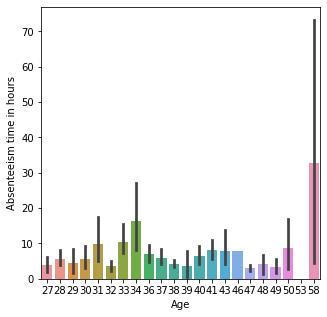

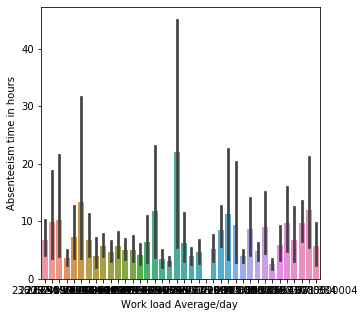

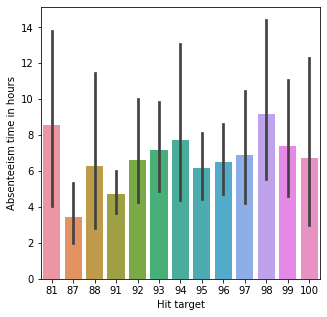

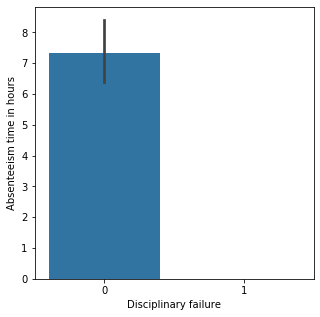

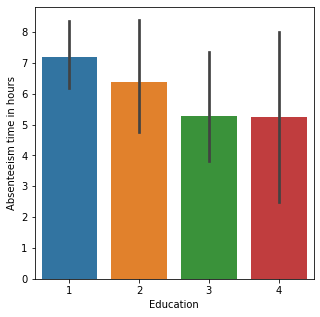

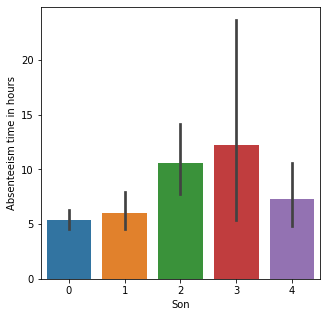

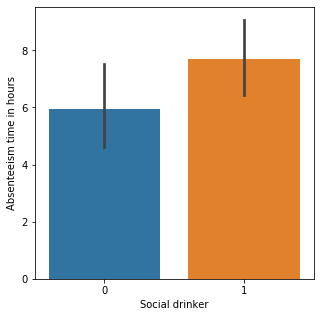

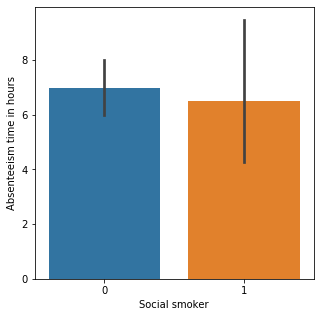

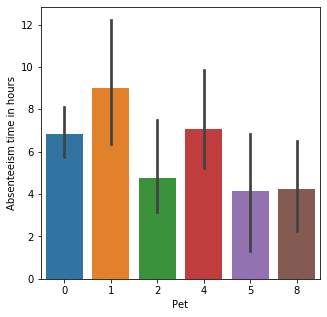

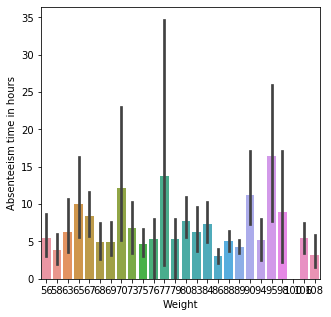

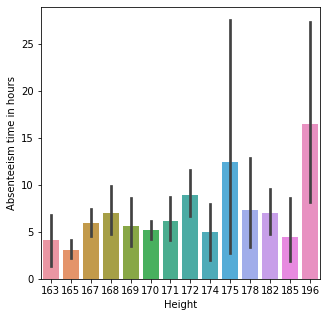

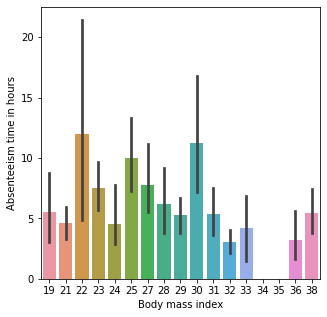

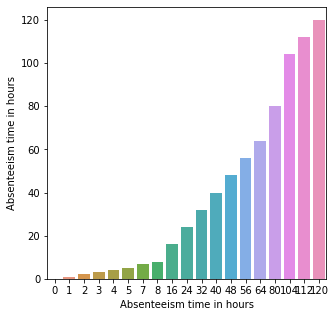

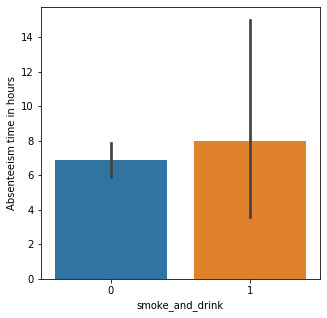

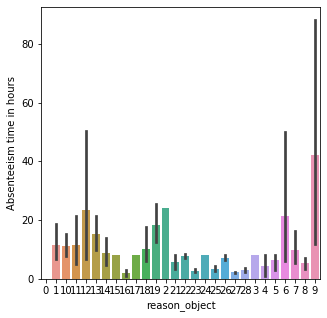

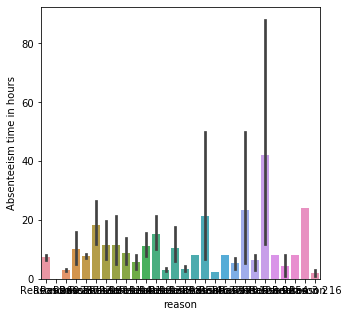

In [43]:
for shad in df.columns:
    fig, ax = plt.subplots(figsize=(5, 5),)
    sns.barplot(y="Absenteeism time in hours", x = shad,data=df)
    plt.show(fig)

In [45]:
index_names = df[ df['Absenteeism time in hours'] <= 40 ].index 
dfdropped40=df.drop(index_names)

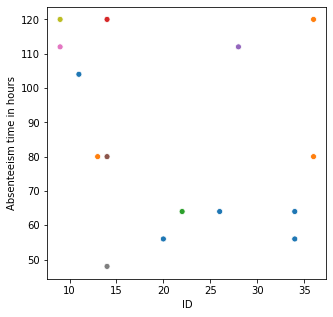

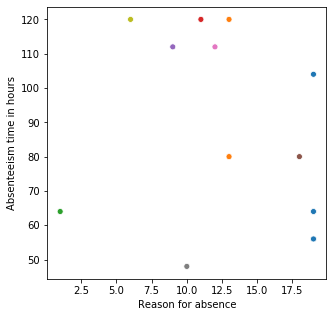

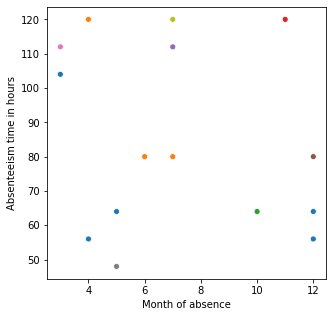

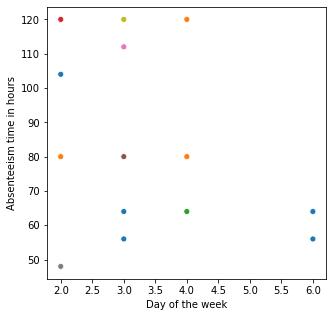

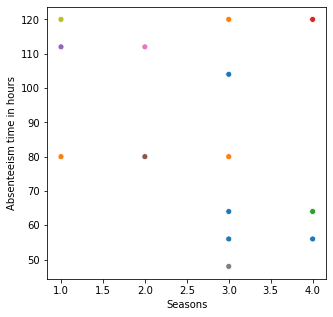

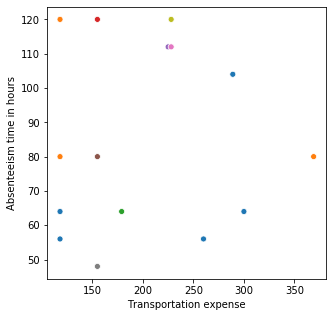

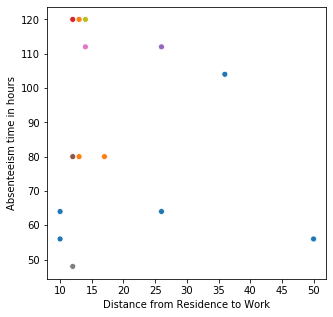

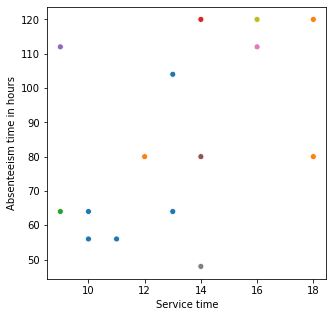

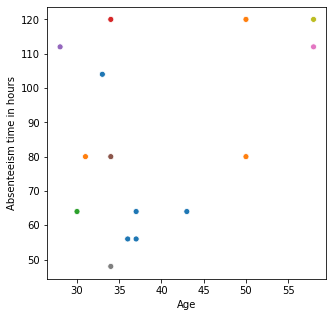

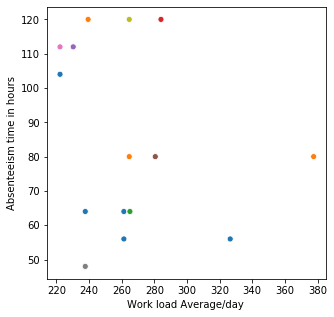

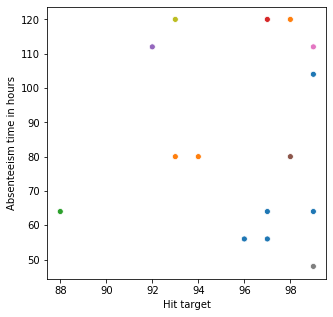

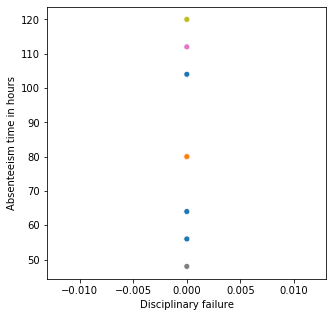

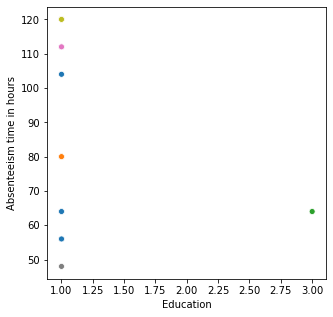

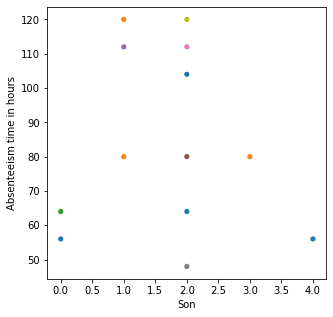

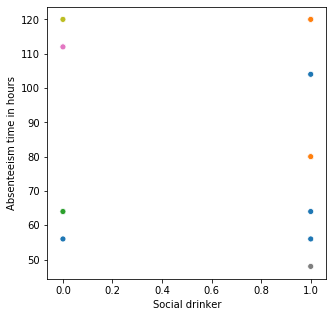

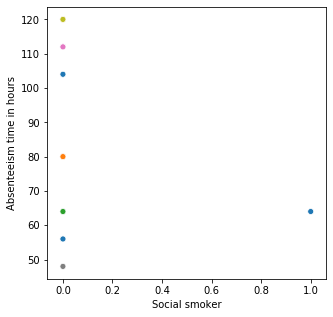

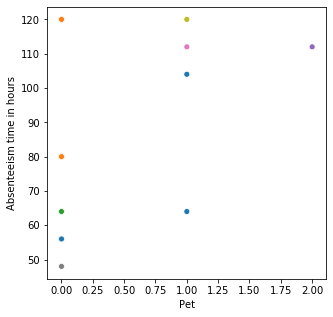

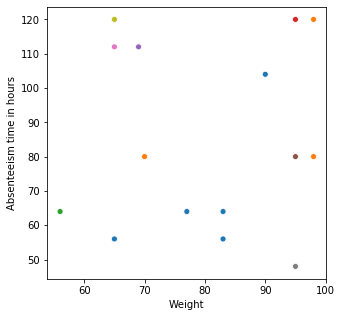

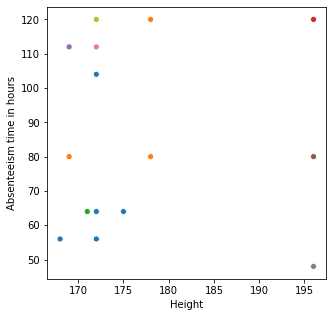

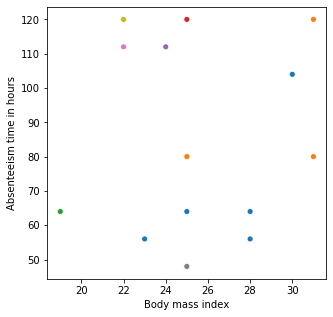

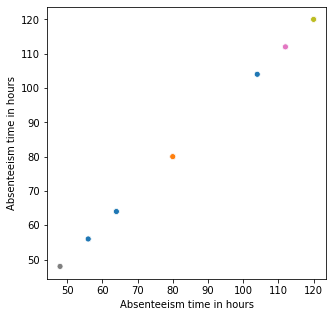

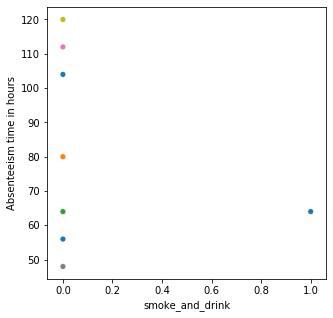

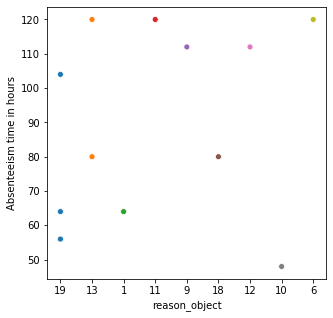

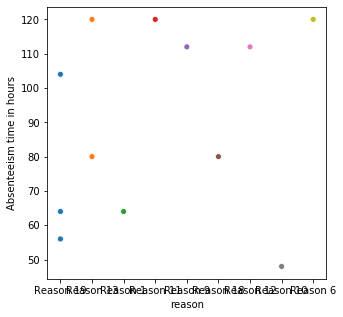

In [46]:
for shad in dfdropped40.columns:
    fig, ax = plt.subplots(figsize=(5, 5),)
    sns.scatterplot(y="Absenteeism time in hours", x = shad, data=dfdropped40,hue="reason",legend=False)
    plt.show(fig)

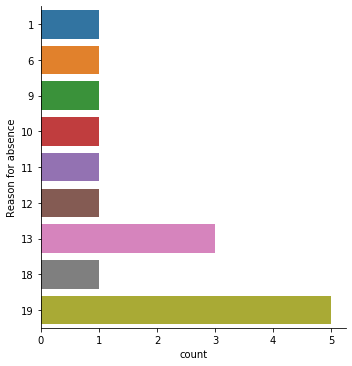

In [69]:
sns.factorplot(
    y='Reason for absence',
    data=dfdropped40,
    kind='count',

)

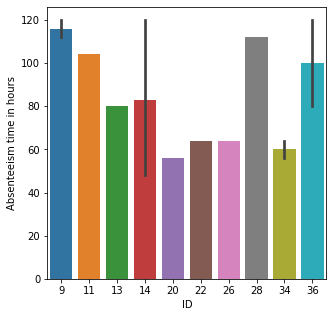

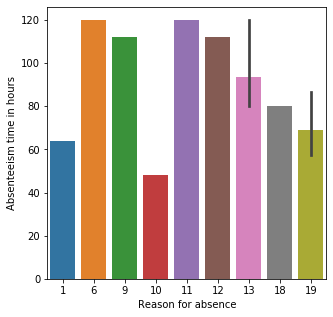

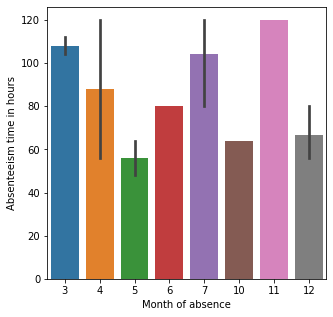

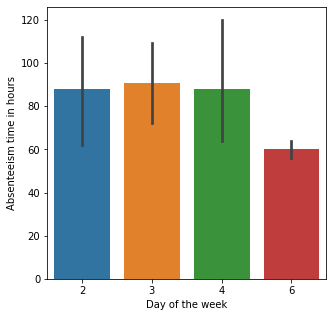

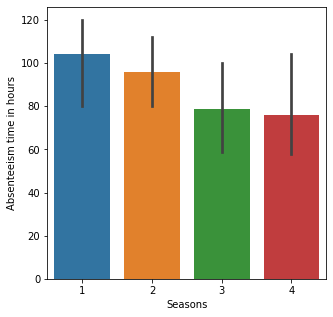

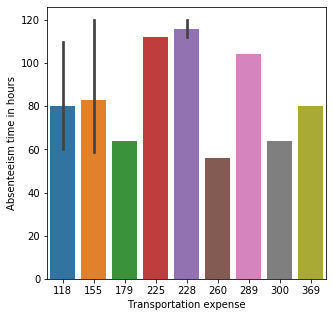

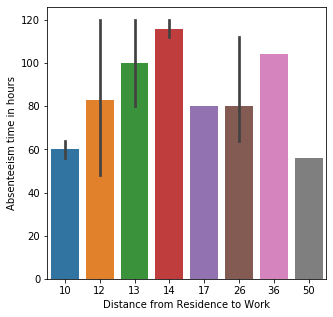

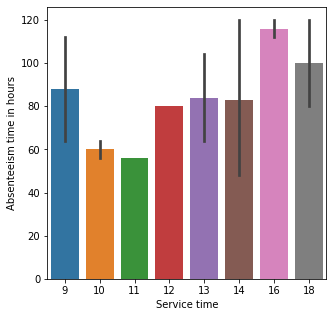

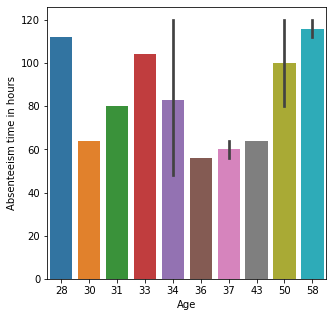

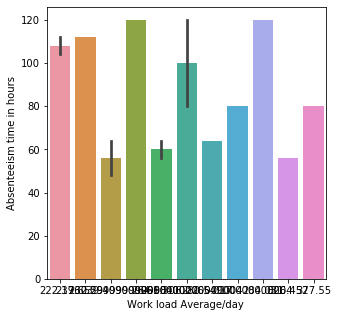

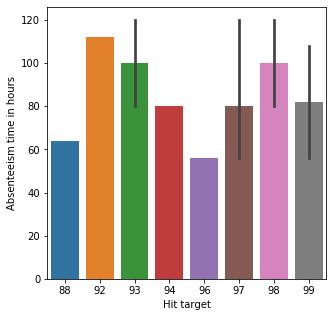

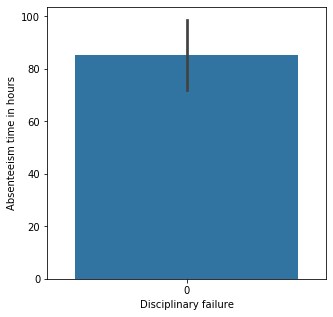

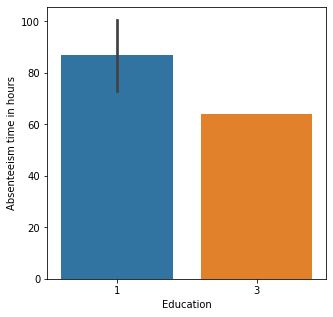

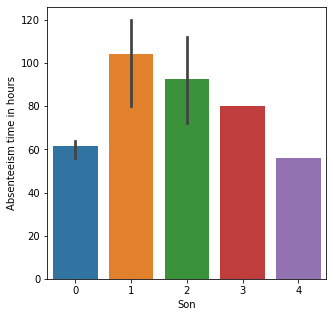

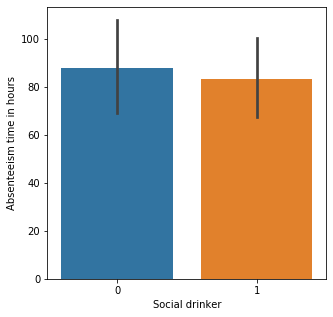

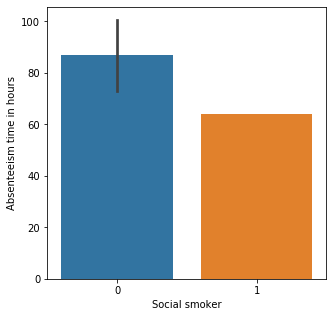

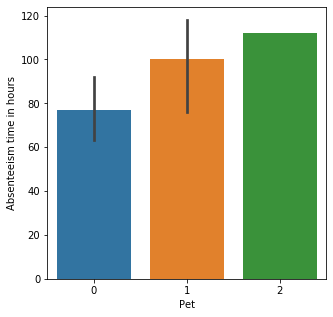

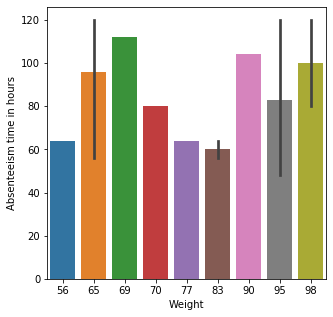

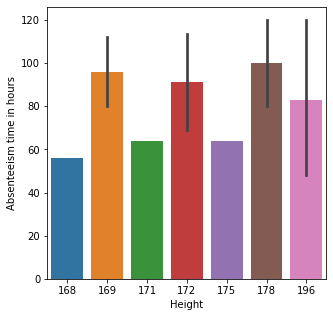

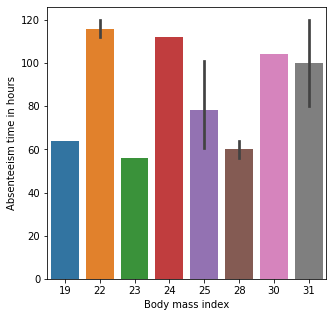

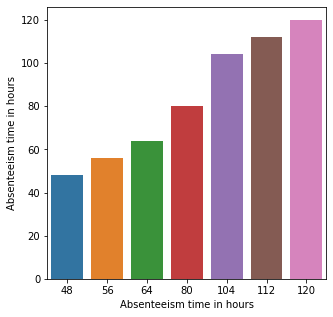

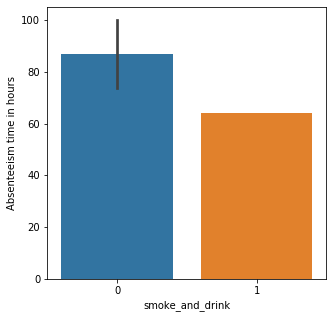

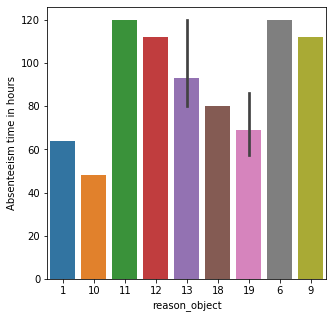

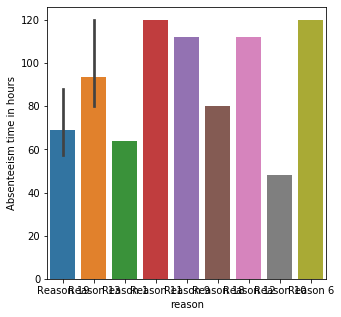

In [50]:
for shad in dfdropped40.columns:
    fig, ax = plt.subplots(figsize=(5, 5),)
    sns.barplot(y="Absenteeism time in hours", x = shad,data=dfdropped40)
    plt.show(fig)

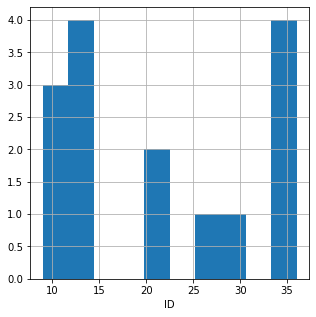

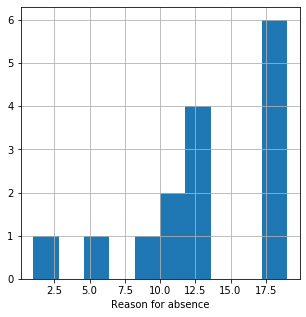

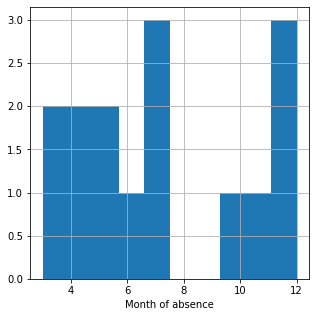

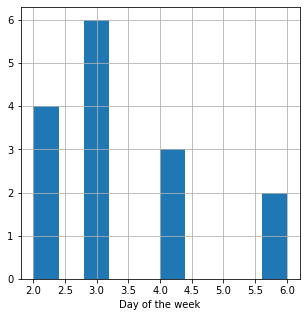

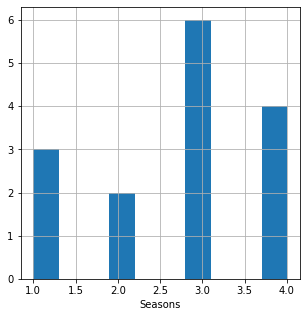

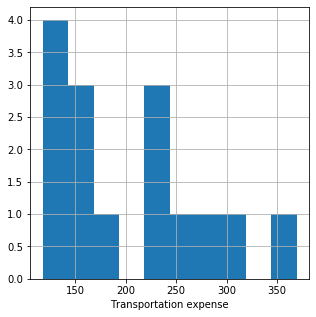

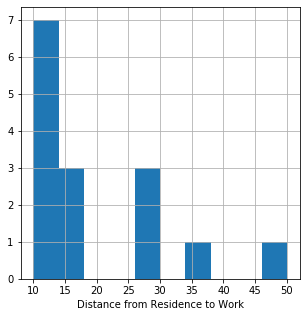

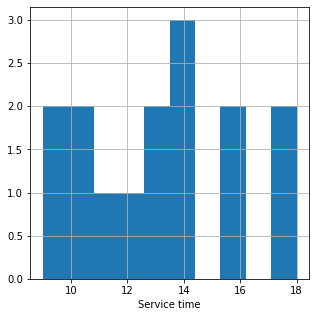

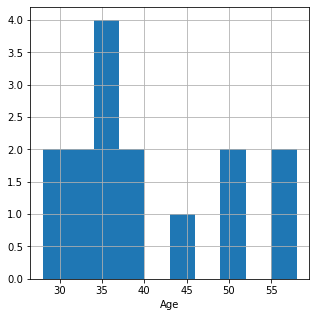

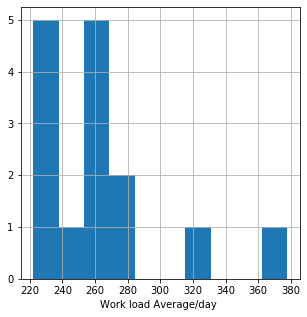

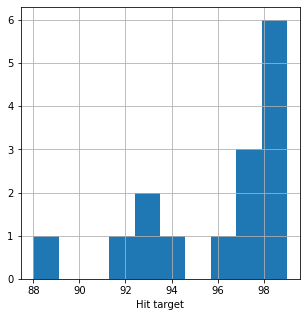

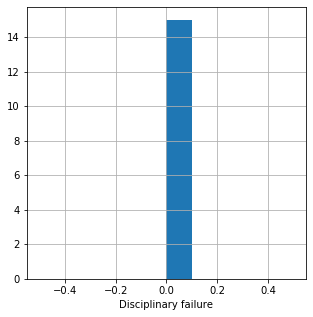

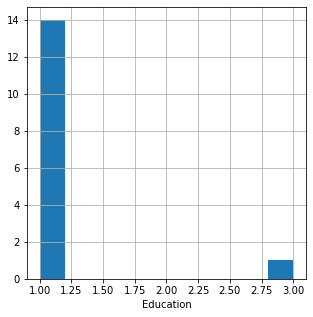

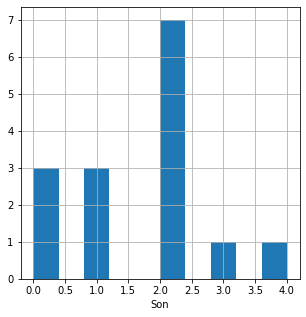

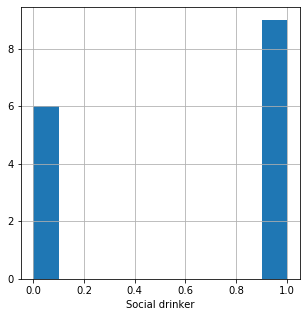

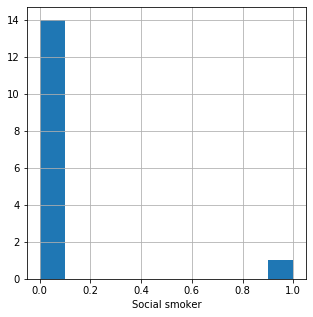

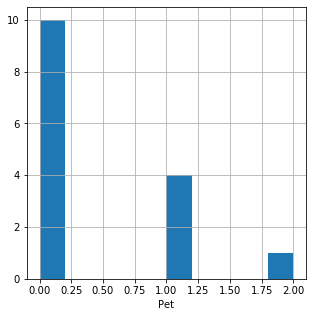

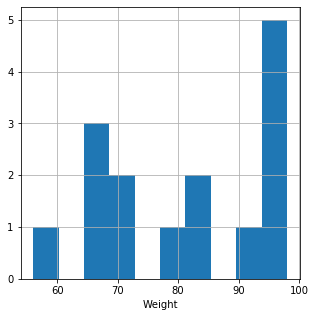

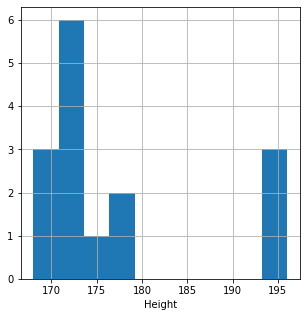

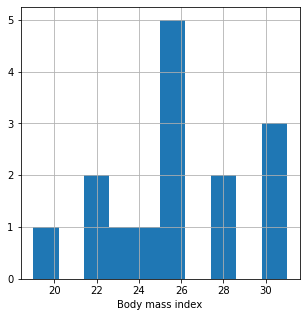

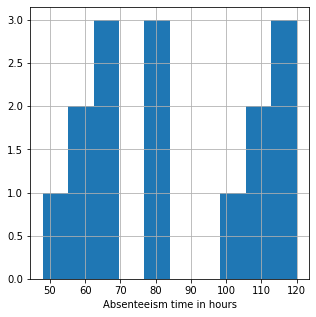

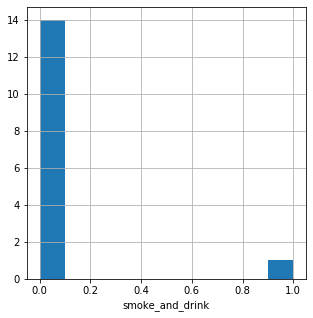

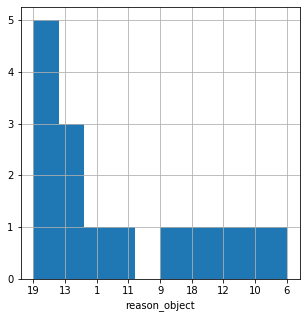

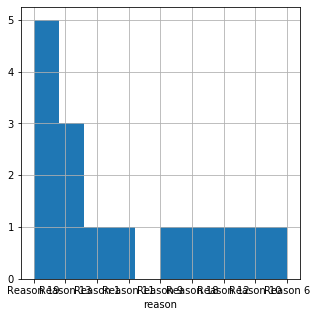

In [58]:
for shad in dfdropped40.columns:
    fig, ax = plt.subplots(figsize=(5, 5),)
    dfdropped40[shad].hist()
    plt.xlabel(shad)
    plt.show(fig)

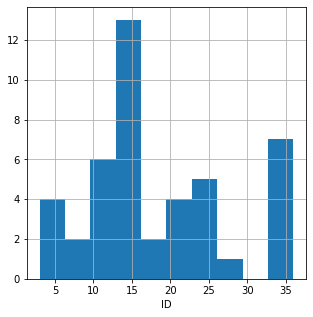

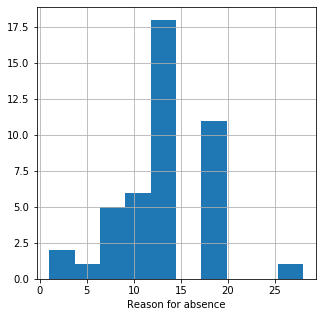

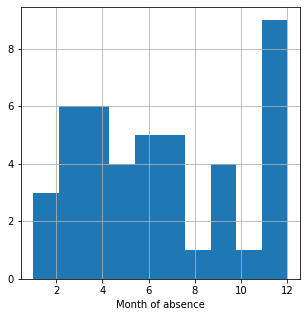

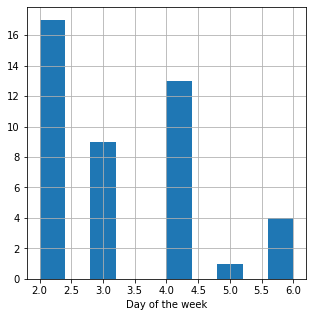

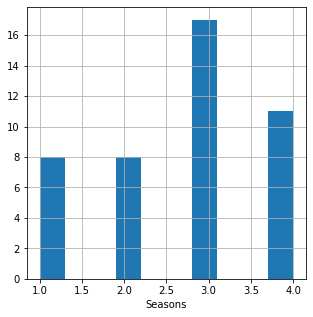

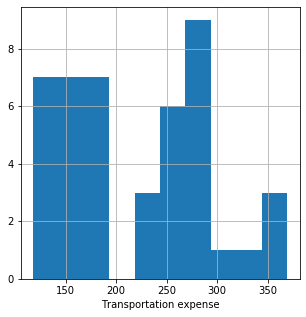

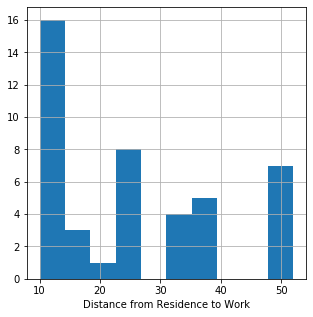

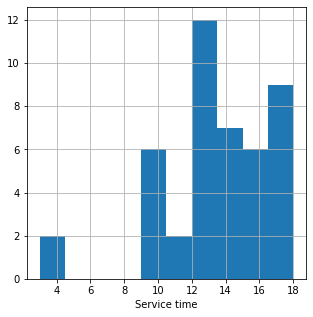

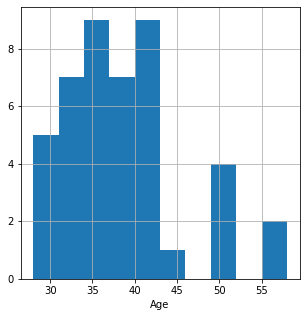

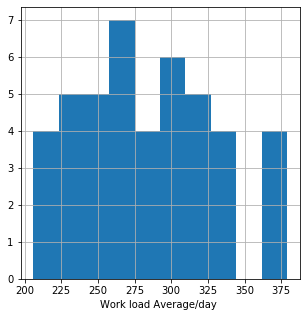

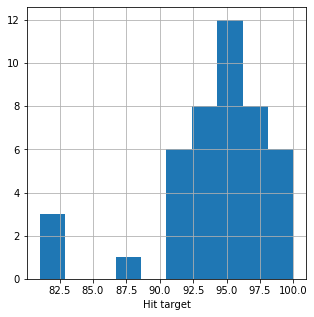

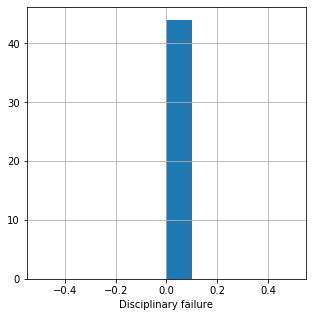

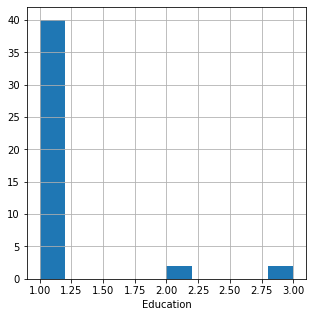

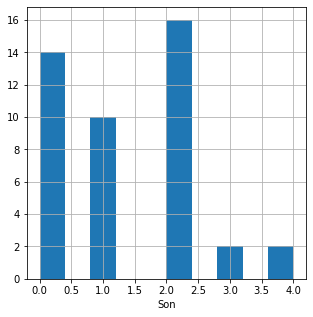

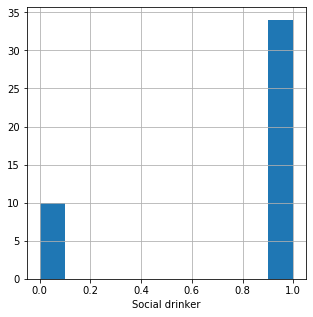

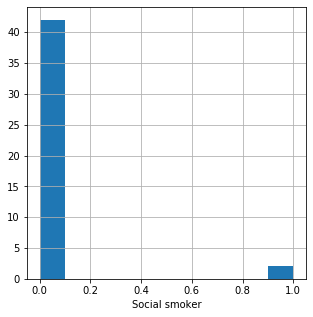

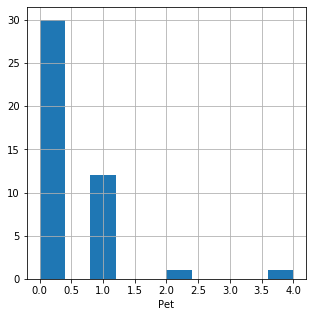

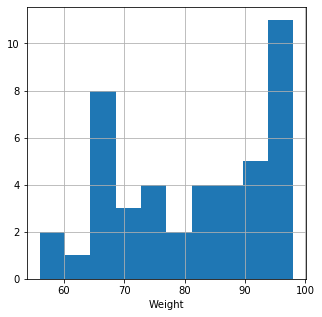

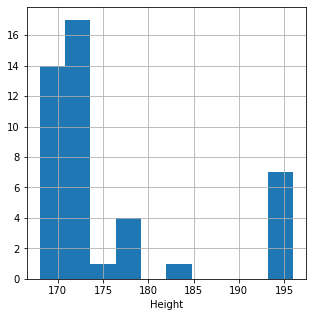

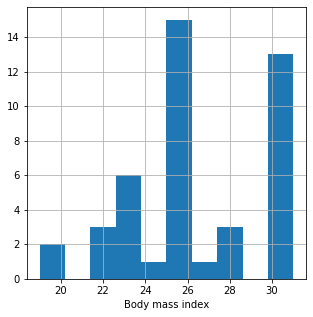

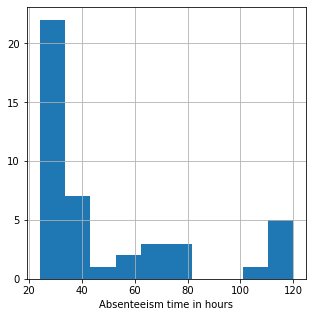

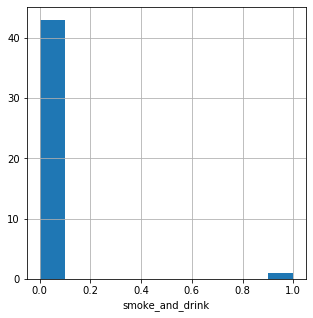

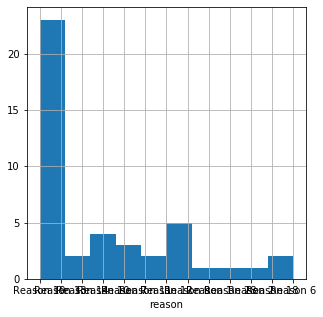

In [60]:
for shad in dfdropped.columns:
    fig, ax = plt.subplots(figsize=(5, 5),)
    dfdropped[shad].hist()
    plt.xlabel(shad)
    plt.show(fig)

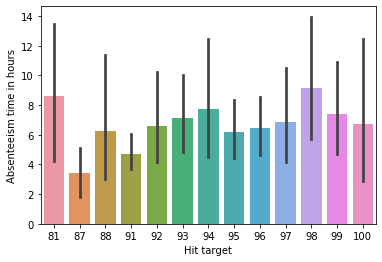

In [66]:
sns.barplot(y="Absenteeism time in hours", x = "Hit target",data=df)